In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)


In [2]:
ds_data = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/TSG/ALL_horizontal_gradients.nc', chunks={'time': 1e7})

In [3]:
GSbox=(-65+360,-60+360,37,42)
NEbox=(10,15,55,60)
ACbox=(-32+360,-27+360,31,36)

In [4]:
_lon=ds_data['lon'][:]
_lat=ds_data['lat'][:]


In [5]:
domainGS=(GSbox[0]<_lon)*(_lon<GSbox[1])*(GSbox[2]<_lat)*(_lat<GSbox[3])

whereGS=np.where(domainGS)

latsGS=_lat[whereGS[0][:]]
lonsGS=_lon[whereGS[0][:]]

gradTGS=ds_data['SST_LS'][whereGS[0][:]]
gradSGS=ds_data['SSS_LS'][whereGS[0][:]]
gradbGS=ds_data['SSb_LS'][whereGS[0][:]]


In [6]:
domainNE=(NEbox[0]<_lon)*(_lon<NEbox[1])*(NEbox[2]<_lat)*(_lat<NEbox[3])

whereNE=np.where(domainNE)

latsNE=_lat[whereNE[0][:]]
lonsNE=_lon[whereNE[0][:]]

gradTNE=ds_data['SST_LS'][whereNE[0][:]]
gradSNE=ds_data['SSS_LS'][whereNE[0][:]]
gradbNE=ds_data['SSb_LS'][whereNE[0][:]]


In [7]:
domainAC=(ACbox[0]<_lon)*(_lon<ACbox[1])*(ACbox[2]<_lat)*(_lat<ACbox[3])

whereAC=np.where(domainAC)

latsAC=_lat[whereAC[0][:]]
lonsAC=_lon[whereAC[0][:]]

gradTAC=ds_data['SST_LS'][whereAC[0][:]]
gradSAC=ds_data['SSS_LS'][whereAC[0][:]]
gradbAC=ds_data['SSb_LS'][whereAC[0][:]]


In [17]:
gradTGS_nonan=gradTGS[~np.isnan(gradTGS)]
gradSGS_nonan=gradSGS[~np.isnan(gradSGS)]
gradbGS_nonan=gradbGS[~np.isnan(gradbGS)]
gradTNE_nonan=gradTNE[~np.isnan(gradTNE)]
gradSNE_nonan=gradSNE[~np.isnan(gradSNE)]
gradbNE_nonan=gradbNE[~np.isnan(gradbNE)]
gradTAC_nonan=gradTAC[~np.isnan(gradTAC)]
gradSAC_nonan=gradSAC[~np.isnan(gradSAC)]
gradbAC_nonan=gradbAC[~np.isnan(gradbAC)]

In [26]:
gradTGS_nonan_filt=gradTGS_nonan[gradTGS_nonan < 1e-4]
gradSGS_nonan_filt=gradSGS_nonan[gradSGS_nonan < 5e-5]
gradbGS_nonan_filt=gradbGS_nonan[gradbGS_nonan < 2e-7]
gradTNE_nonan_filt=gradTNE_nonan[gradTNE_nonan < 1e-4]
gradSNE_nonan_filt=gradSNE_nonan[gradSNE_nonan < 5e-5]
gradbNE_nonan_filt=gradbNE_nonan[gradbNE_nonan < 2e-7]
gradTAC_nonan_filt=gradTAC_nonan[gradTAC_nonan < 1e-4]
gradSAC_nonan_filt=gradSAC_nonan[gradSAC_nonan < 5e-5]
gradbAC_nonan_filt=gradbAC_nonan[gradbAC_nonan < 2e-7]

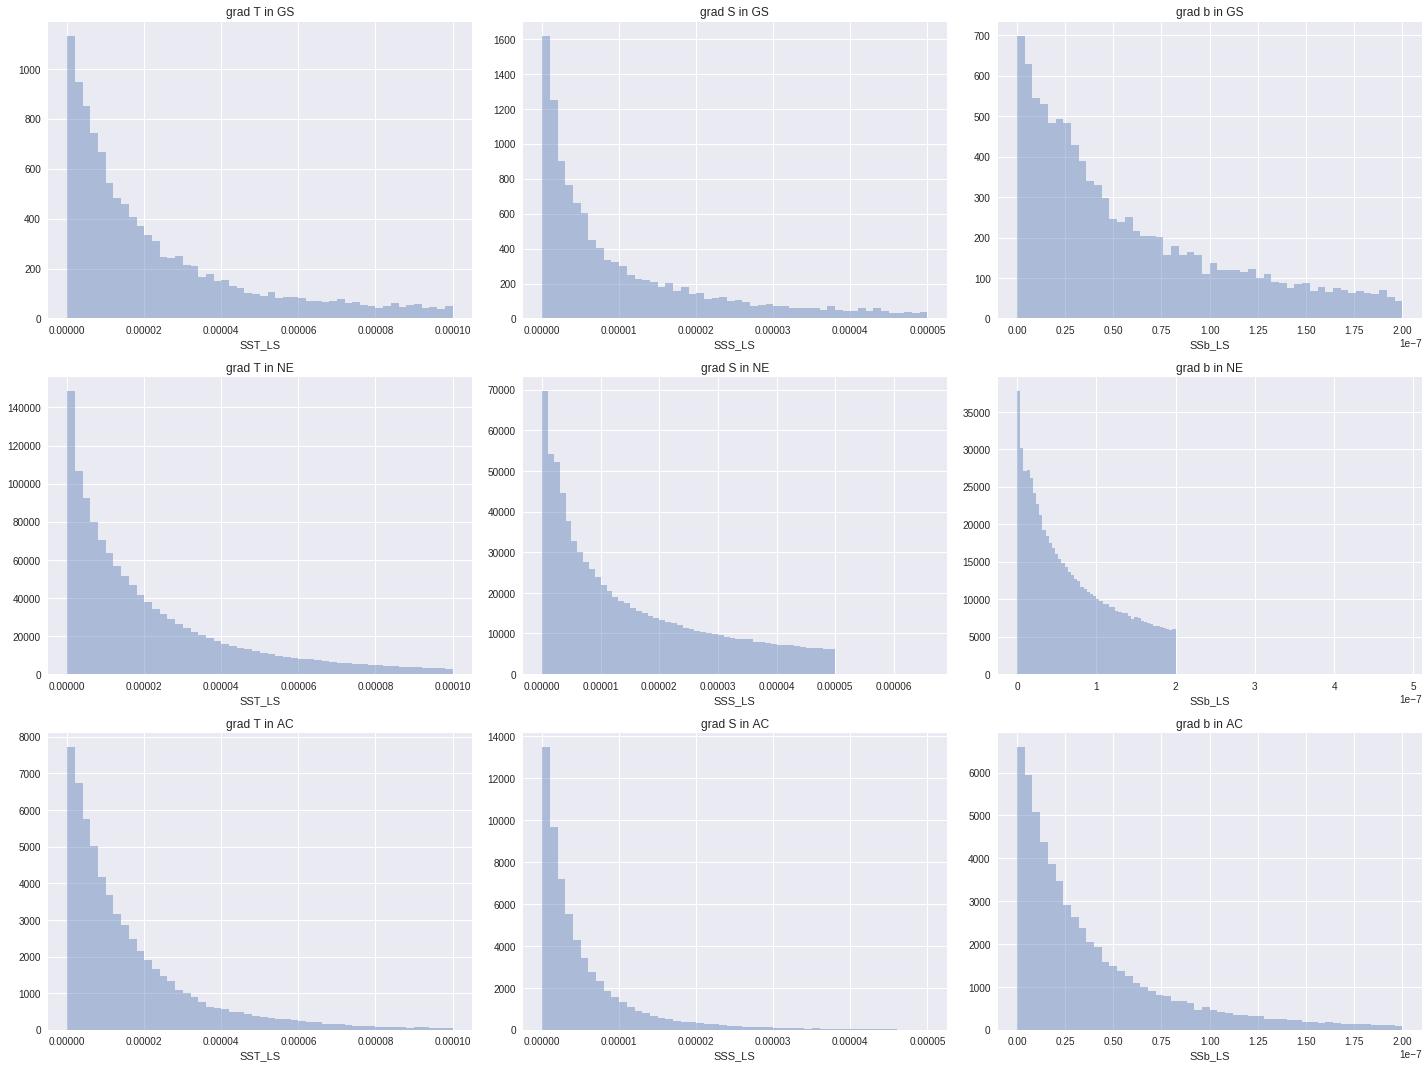

In [27]:
fig = plt.figure(figsize=(20.0, 15.0))

axes1 = fig.add_subplot(3, 3, 1)
sns.distplot(np.abs(gradTGS_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,1e-4]})
plt.title('grad T in GS')

axes2 = fig.add_subplot(3, 3, 2)
sns.distplot(np.abs(gradSGS_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,5e-5]})
plt.title('grad S in GS')

axes3 = fig.add_subplot(3, 3, 3)
sns.distplot(np.abs(gradbGS_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,2e-7]})
plt.title('grad b in GS')

axes1 = fig.add_subplot(3, 3, 4)
sns.distplot(np.abs(gradTNE_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,1e-4]})
plt.title('grad T in NE')

axes2 = fig.add_subplot(3, 3, 5)
sns.distplot(np.abs(gradSNE_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,5e-5]})
plt.title('grad S in NE')

axes3 = fig.add_subplot(3, 3, 6)
sns.distplot(np.abs(gradbNE_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,2e-7]})
plt.title('grad b in NE')

axes1 = fig.add_subplot(3, 3, 7)
sns.distplot(np.abs(gradTAC_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,1e-4]})
plt.title('grad T in AC')

axes2 = fig.add_subplot(3, 3, 8)
sns.distplot(np.abs(gradSAC_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,5e-5]})
plt.title('grad S in AC')

axes3 = fig.add_subplot(3, 3, 9)
sns.distplot(np.abs(gradbAC_nonan_filt),hist=True, kde=False,hist_kws={"range": [0,2e-7]})
plt.title('grad b in AC')


fig.tight_layout()
plt.savefig('hist_grad_data.png')

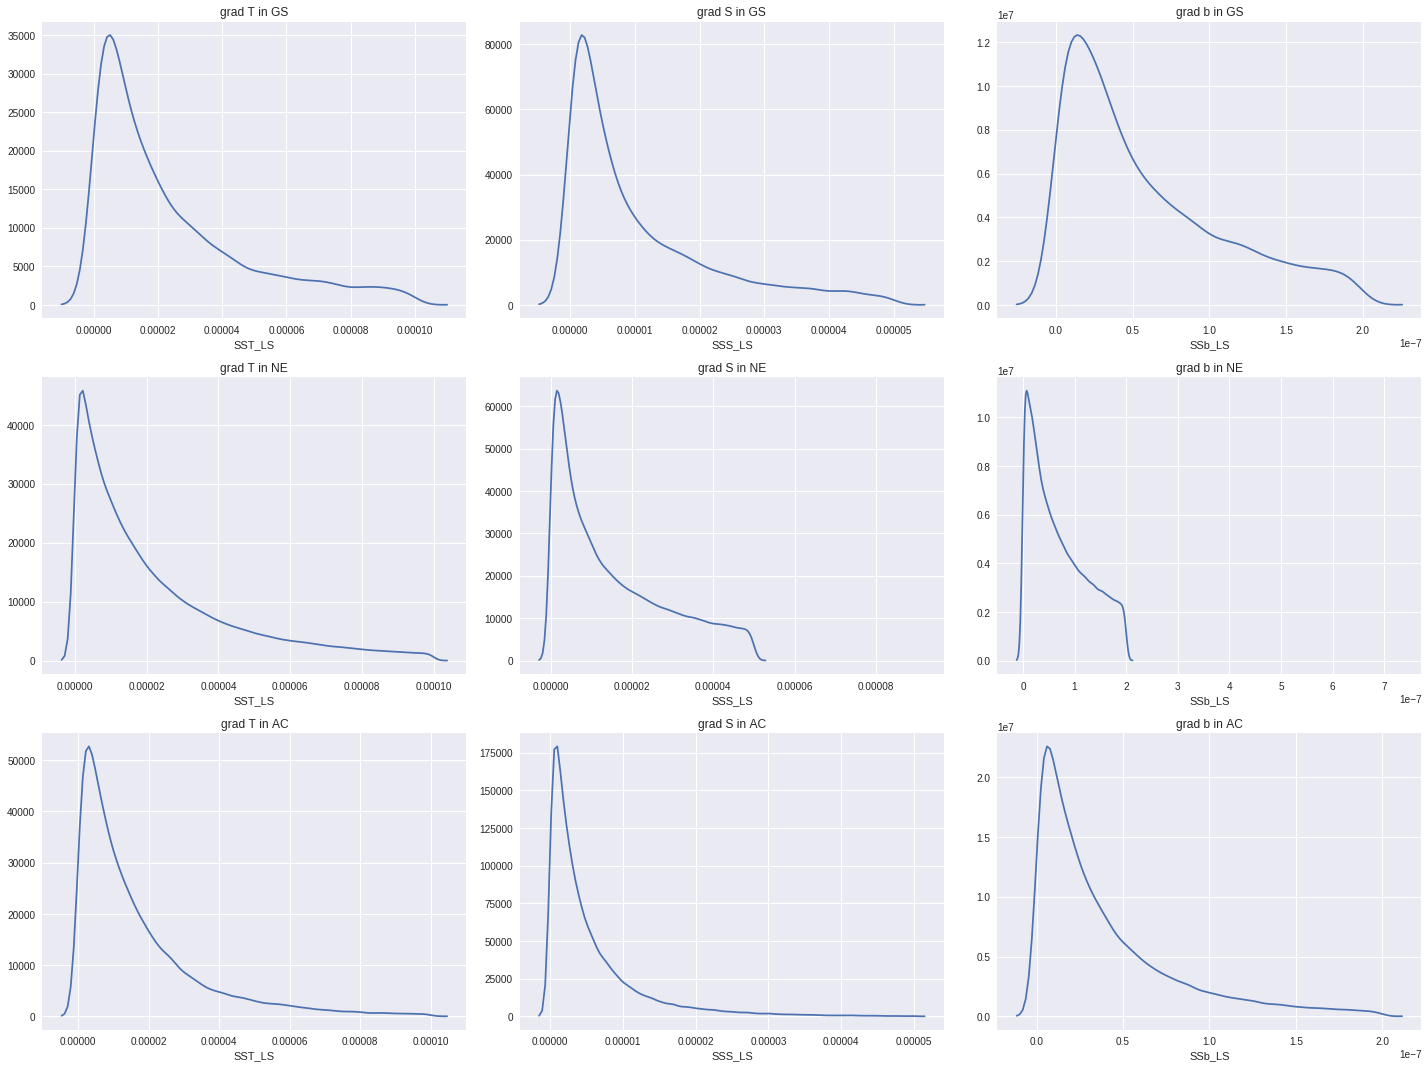

In [25]:
fig = plt.figure(figsize=(20.0, 15.0))

axes1 = fig.add_subplot(3, 3, 1)
sns.distplot(np.abs(gradTGS_nonan),hist=False, kde=True,kde_kws={"clip": (0,1e-4)})
plt.title('grad T in GS')

axes2 = fig.add_subplot(3, 3, 2)
sns.distplot(np.abs(gradSGS_nonan),hist=False, kde=True,kde_kws={"clip": (0,5e-5)})
plt.title('grad S in GS')

axes3 = fig.add_subplot(3, 3, 3)
sns.distplot(np.abs(gradbGS_nonan),hist=False, kde=True,kde_kws={"clip": (0,2e-7)})
plt.title('grad b in GS')

axes1 = fig.add_subplot(3, 3, 4)
sns.distplot(np.abs(gradTNE_nonan),hist=False, kde=True,kde_kws={"clip": (0,1e-4)})
plt.title('grad T in NE')

axes2 = fig.add_subplot(3, 3, 5)
sns.distplot(np.abs(gradSNE_nonan),hist=False, kde=True,kde_kws={"clip": (0,5e-5)}) 
plt.title('grad S in NE')

axes3 = fig.add_subplot(3, 3, 6)
sns.distplot(np.abs(gradbNE_nonan),hist=False, kde=True,kde_kws={"clip": (0,2e-7)})
plt.title('grad b in NE')

axes1 = fig.add_subplot(3, 3, 7)
sns.distplot(np.abs(gradTAC_nonan),hist=False, kde=True,kde_kws={"clip": (0,1e-4)})
plt.title('grad T in AC')

axes2 = fig.add_subplot(3, 3, 8)
sns.distplot(np.abs(gradSAC_nonan),hist=False, kde=True,kde_kws={"clip": (0,5e-5)})
plt.title('grad S in AC')

axes3 = fig.add_subplot(3, 3, 9)
sns.distplot(np.abs(gradbAC_nonan),hist=False, kde=True,kde_kws={"clip": (0,2e-7)})
plt.title('grad b in AC')


fig.tight_layout()
plt.savefig('hist_grad_data.png')